# Ujian Modul 2 - Purwadhika Data Science JC Program

## Context - Taken from Kaggle
Did you know that claims can be filed against TSA? Sometimes US Terminal Security Agency (TSA) makes mistakes. People can get hurt and property can be damaged, lost, or stolen. Claims are generally filed against TSA for personal injuries and lost or damaged property during screenings and they keep records of every claim!

### Content
The dataset includes claims filed between 2002 through 2015.

1. Claim Number
1. Date Received
1. Incident Date
1. Airport Code
1. Airport Name
1. Airline Name
1. Claim Type
1. Claim Site
1. Item
1. Claim Amount
1. Status
1. Close Amount
1. Disposition

This data is coming from the Kaggle Dataset that contain the data of clain the been filed into the TSA. We would try to explore the data and clean the data partially (we would not clean and analyze everything as it would take more time than necessary) and we would only use 25% data from the original dataset.

This exam scoring would be explained below:

- This Notebook would have total score of 80 (+ 10 Bonus POINT for Bonus Question), which consist of:
    - 40 POINT for the Question part (10 point for each question)
    - 40 POINT for the preprocessing part by following the guide
- The Dashboard would yield 20 POINT
- The Maximum Score would be still 100, Bonus Question is just a Bonus. Work it if you have an extra time and already sure about all your other answer (or not sure about the other question, and need this bonus question to help)

When you finish, upload your notebook contain all the answers and the script for the dashboard to your github. You do not need to upload the .csv file. 

Try to read the data and show all the important info first. For starter, try to understand what each column represent.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
tsa = pd.read_csv('tsa_claims_ujian.csv')

In [3]:
tsa.head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909816M,7-Feb-02,1/6/2003 0:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full
1,14268,20-Jun-02,6/16/2002 0:00,PHX,Phoenix Sky Harbor International,NaN,Property Damage,Checkpoint,Computer - Laptop,$2;270.09,Canceled,NaN,NaN
2,15242,12-Jul-02,5/31/2002 0:00,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,NaN,Other,Luggage (all types including footlockers),$200.00,Denied,$0.00,Deny
3,16759,21-Aug-02,7/12/2002 0:00,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Checkpoint,Other,$21.44,Approved,$21.00,Approve in Full
4,17846,9-Sep-02,8/30/2002 0:00,BOS,Boston (Logan) International Airport,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),$1;832.22,Canceled,$0.00,NaN


In [4]:
tsa.loc[51061:51065]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
51061,2015110926685,22-Oct-15,19-Oct-15,-,-,-,Property Damage,Checked Baggage,Baggage/Cases/Purses,-,-,NaN,NaN
51062,2015110226479,2-Nov-15,2-Nov-15,-,-,-,Passenger Property Loss,Checkpoint,Books; Magazines & Other,-,-,NaN,NaN
51063,2015120727336,16-Nov-15,14-Sep-15,-,-,American Airlines,Passenger Property Loss,Checked Baggage,Cosmetics & Grooming,-,-,NaN,NaN
51064,2015120427297,20-Nov-15,16-Oct-15,-,-,-,Property Damage,Checked Baggage,Baggage/Cases/Purses; Books; Magazines & Other...,-,-,NaN,NaN
51065,2016010428072,22-Dec-15,20-Dec-15,-,-,-,Passenger Property Loss,Checked Baggage,Clothing,-,-,NaN,NaN


In [5]:
tsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51066 entries, 0 to 51065
Data columns (total 13 columns):
Claim Number     51066 non-null object
Date Received    50996 non-null object
Incident Date    50496 non-null object
Airport Code     49014 non-null object
Airport Name     49014 non-null object
Airline Name     42511 non-null object
Claim Type       49106 non-null object
Claim Site       50876 non-null object
Item             50054 non-null object
Claim Amount     50074 non-null object
Status           51065 non-null object
Close Amount     33786 non-null object
Disposition      32846 non-null object
dtypes: object(13)
memory usage: 5.1+ MB


In [6]:
tsa.describe(exclude='number')

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
count,51066,50996,50496,49014,49014,42511,49106,50876,50054,50074,51065,33786,32846
unique,51065,3522,10788,405,419,243,8,6,1854,13248,13,6009,3
top,2013121110011,27-May-04,12/22/2004 0:00,LAX,John F. Kennedy International,American Airlines,Passenger Property Loss,Checked Baggage,Other,$0.00,Denied,$0.00,Deny
freq,2,182,43,2379,2286,4377,29713,39937,9183,7065,17134,17907,17147


In [7]:
tsaDesc = []
for i in tsa.columns:
    tsaDesc.append([i,
                   tsa[i].dtypes,
                   tsa[i].isna().sum(),
                   round((((tsa[i].isna().sum())/(len(tsa)))*100),2),
                   tsa[i].nunique(),
                   tsa[i].drop_duplicates().sample(2).values])
pd.DataFrame(tsaDesc, columns = ['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'])

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Claim Number,object,0,0.00,51065,"[1008011M, 2004122169998]"
1,Date Received,object,70,0.14,3522,"[28-Aug-04, 7-Mar-08]"
2,Incident Date,object,570,1.12,10788,"[6-Jun-14, 8/24/2012 14:30]"
3,Airport Code,object,2052,4.02,405,"[PGD, ERI]"
4,Airport Name,object,2052,4.02,419,"[Elmira Corning International, Niagara Falls I..."
5,Airline Name,object,8555,16.75,243,"[Air Belgium International S A, Air Tahiti Nui]"
6,Claim Type,object,1960,3.84,8,"[nan, -]"
7,Claim Site,object,190,0.37,6,"[Bus Station, Checkpoint]"
8,Item,object,1012,1.98,1854,"[Cameras; Cosmetics & Grooming, Office Furnish..."
9,Claim Amount,object,992,1.94,13248,"[$4.29 , $61.03 ]"


If you notice, there is '-' value that become a filler for an empty value. Replace all these '-' in every column into NaN object (np.nan) 

In [8]:
tsa.replace(to_replace=['-'], value=np.nan, inplace=True)

In [9]:
tsaDesc = []
for i in tsa.columns:
    tsaDesc.append([i,
                   tsa[i].dtypes,
                   tsa[i].isna().sum(),
                   round((((tsa[i].isna().sum())/(len(tsa)))*100),2),
                   tsa[i].nunique(),
                   tsa[i].drop_duplicates().sample(2).values])
pd.DataFrame(tsaDesc, columns = ['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'])

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Claim Number,object,0,0.00,51065,"[2012091796879, 2014040913092]"
1,Date Received,object,70,0.14,3522,"[24-Apr-08, 2-Jun-10]"
2,Incident Date,object,570,1.12,10788,"[11/26/2006 0:00, 6/19/2011 18:00]"
3,Airport Code,object,2151,4.21,404,"[PIH, BFL]"
4,Airport Name,object,2151,4.21,418,"[Port Columbus International, Great Falls Inte..."
5,Airline Name,object,9596,18.79,242,"[Aerolineas Argentinas, EL AL Israeli Airlines ]"
6,Claim Type,object,2031,3.98,7,"[Complaint, Passenger Property Loss]"
7,Claim Site,object,249,0.49,5,"[Checkpoint, Motor Vehicle]"
8,Item,object,2148,4.21,1853,[Cell Phones; Clothing - Shoes; belts; accesso...
9,Claim Amount,object,4180,8.19,13247,"[$1;913.12 , $4.25 ]"


Try to convert the Date Received and Incident Date data type into Datetime object. For the Incident Date columns, if you directly try to convert the column into datetime object it would raise an error notice. In that case, try to show the dataframe with the Incident Date column contain all the error.  

In [10]:
Date_Received = tsa['Date Received']
Date_Received = pd.to_datetime(Date_Received)
Date_Received

0       2002-02-07
1       2002-06-20
2       2002-07-12
3       2002-08-21
4       2002-09-09
           ...    
51061   2015-10-22
51062   2015-11-02
51063   2015-11-16
51064   2015-11-20
51065   2015-12-22
Name: Date Received, Length: 51066, dtype: datetime64[ns]

For below cell, I try to show the dataframe with Incident Date column contain all the error since I try to convert that column into datetime object

In [11]:
# def convert_IncidentDate(cols):
#     try:
#         pd.to_datetime(cols)
#     except ValueError:
#         print('Oops!  value can not be converted to Date Time')

# tsa['Incident Date'] = tsa['Incident Date'].apply(convert_IncidentDate)
# tsa

In [12]:
index_error = []
index_success = []
# incident_time = []
# time_err = {}
for i in range(len(tsa['Incident Date'])):
    try:
        pd.to_datetime(tsa['Incident Date'][i])
        index_success.append(i)
    except:
        index_error.append(i)
tsa.loc[index_error]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
13729,2005021676300,24-Jan-05,17-MAY-0200 00:00,JFK,John F. Kennedy International,NaN,Passenger Property Loss,Checkpoint,Other,$15.00,Approved,$15.00,Approve in Full
14323,2005031778682,23-Feb-05,17-FEB-0205 00:00,MSY,New Orleans International,UAL,Passenger Property Loss,Checked Baggage,Computer - Laptop,$2;463.00,Denied,NaN,Deny
14856,2005033180821,23-Mar-05,07-MAR-0005 00:00,CVG,Cincinnati/Northern Kentucky International,Delta Air Lines,Passenger Property Loss,Checked Baggage,Cameras - Digital,$430.98,Approved,$430.98,Approve in Full
14976,2005040181143,29-Mar-05,04-MAR-0205 00:00,MSP,Minneapolis/ St.Paul International Airport,Northwest Airlines,Passenger Property Loss,Checked Baggage,Jewelry - Fine,$151.00,Insufficient; one of the following items requi...,NaN,NaN
14995,2005040581540,30-Mar-05,18-MAR-0200 00:00,MAF,Midland International Airport,Continental Express Inc,Passenger Property Loss,Checked Baggage,Locks,$10.60,Approved,$10.60,Approve in Full
15278,2005041282328,12-Apr-05,12-MAR-0205 00:00,MSP,Minneapolis/ St.Paul International Airport,Northwest Airlines,Property Damage,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,$710.00,Denied,$0.00,Deny
15934,2005051985030,17-May-05,01-MAY-0205 00:00,NaN,NaN,NaN,Passenger Property Loss,Checked Baggage,Jewelry - Fine,$197.73,Insufficient; one of the following items requi...,NaN,NaN
16813,2005071188622,8-Jul-05,01-JUL-0200 00:00,HDN,Yampa Valley Regional,NaN,Passenger Property Loss,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,$300.00,Denied,$0.00,Deny
17198,2005091492472,1-Aug-05,01-MAY-0205 00:00,IAH,Houston - George Bush Intercontinental Airport,UAL,Passenger Property Loss,Checked Baggage,Other,$2;000.72,Denied,$0.00,Deny
19151,2005121397614,8-Dec-05,20-NOV-0205 00:00,LNK,Lincoln Municipal,Northwest Airlines,Passenger Property Loss,Checked Baggage,Locks,$15.00,Approved,$15.00,Approve in Full


For the data in the Incident Date column that contain error, replace the year with the year that come from the Date Received column and replace the Incident Date data type into datetime object

In [13]:
df_err = tsa.loc[index_error]
df_err

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
13729,2005021676300,24-Jan-05,17-MAY-0200 00:00,JFK,John F. Kennedy International,NaN,Passenger Property Loss,Checkpoint,Other,$15.00,Approved,$15.00,Approve in Full
14323,2005031778682,23-Feb-05,17-FEB-0205 00:00,MSY,New Orleans International,UAL,Passenger Property Loss,Checked Baggage,Computer - Laptop,$2;463.00,Denied,NaN,Deny
14856,2005033180821,23-Mar-05,07-MAR-0005 00:00,CVG,Cincinnati/Northern Kentucky International,Delta Air Lines,Passenger Property Loss,Checked Baggage,Cameras - Digital,$430.98,Approved,$430.98,Approve in Full
14976,2005040181143,29-Mar-05,04-MAR-0205 00:00,MSP,Minneapolis/ St.Paul International Airport,Northwest Airlines,Passenger Property Loss,Checked Baggage,Jewelry - Fine,$151.00,Insufficient; one of the following items requi...,NaN,NaN
14995,2005040581540,30-Mar-05,18-MAR-0200 00:00,MAF,Midland International Airport,Continental Express Inc,Passenger Property Loss,Checked Baggage,Locks,$10.60,Approved,$10.60,Approve in Full
15278,2005041282328,12-Apr-05,12-MAR-0205 00:00,MSP,Minneapolis/ St.Paul International Airport,Northwest Airlines,Property Damage,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,$710.00,Denied,$0.00,Deny
15934,2005051985030,17-May-05,01-MAY-0205 00:00,NaN,NaN,NaN,Passenger Property Loss,Checked Baggage,Jewelry - Fine,$197.73,Insufficient; one of the following items requi...,NaN,NaN
16813,2005071188622,8-Jul-05,01-JUL-0200 00:00,HDN,Yampa Valley Regional,NaN,Passenger Property Loss,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,$300.00,Denied,$0.00,Deny
17198,2005091492472,1-Aug-05,01-MAY-0205 00:00,IAH,Houston - George Bush Intercontinental Airport,UAL,Passenger Property Loss,Checked Baggage,Other,$2;000.72,Denied,$0.00,Deny
19151,2005121397614,8-Dec-05,20-NOV-0205 00:00,LNK,Lincoln Municipal,Northwest Airlines,Passenger Property Loss,Checked Baggage,Locks,$15.00,Approved,$15.00,Approve in Full


In [14]:
# x = df_err['Date Received'][27481]
# x = pd.to_datetime(x)
# x.year

In [15]:
# date_received_err = []
# incident_date_err = []

# for i in df_err.index:
#     print(i)

for i in df_err.index:
    x = df_err['Date Received'][i]
    x_new = pd.to_datetime(x)
    df_err.at[i, 'Date Received']= x_new
#     df_err['Date Received'][i].replace(to_replace=x, value=x_new, inplace=True)
#     df_err['Date Received'][i] = x
#     date_received_err.append(x)
    
    y=df_err['Incident Date'][i]
    year = x_new.year
    date = str(df_err['Incident Date'][i][:2])
    if df_err['Incident Date'][i][3:6] == 'JAN':
        month = '01'
    elif df_err['Incident Date'][i][3:6] == 'FEB':
        month = '02'
    elif df_err['Incident Date'][i][3:6] == 'MAR':
        month = '03'
    elif df_err['Incident Date'][i][3:6] == 'APR':
        month = '04'
    elif df_err['Incident Date'][i][3:6] == 'MAY':
        month = '05'
    elif df_err['Incident Date'][i][3:6] == 'JUN':
        month = '06'
    elif df_err['Incident Date'][i][3:6] == 'JUL':
        month = '07'
    elif df_err['Incident Date'][i][3:6] == 'AUG':
        month = '08'
    elif df_err['Incident Date'][i][3:6] == 'SEP':
        month = '09'
    elif df_err['Incident Date'][i][3:6] == 'OCT':
        month = '10'
    elif df_err['Incident Date'][i][3:6] == 'NOV':
        month = '11'
    elif df_err['Incident Date'][i][3:6] == 'DEC':
        month = '12'
    y_new = str(year) + '-' + month + '-' + date
    y_new = pd.to_datetime(y_new)
    df_err.at[i, 'Incident Date']= y_new
#     df_err['Incident Date'][i].replace(to_replace=y, value=y_new, inplace=True)
#     df_err['Incident Date'][i] = y
#     incident_date_err.append(y)

# date_received = pd.Series(date_received_err)
# date_received_new = pd.to_datetime(date_received)

# incident_date = pd.Series(incident_date_err)
# incident_date_new = pd.to_datetime(incident_date)

In [16]:
df_err

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
13729,2005021676300,2005-01-24 00:00:00,2005-05-17 00:00:00,JFK,John F. Kennedy International,NaN,Passenger Property Loss,Checkpoint,Other,$15.00,Approved,$15.00,Approve in Full
14323,2005031778682,2005-02-23 00:00:00,2005-02-17 00:00:00,MSY,New Orleans International,UAL,Passenger Property Loss,Checked Baggage,Computer - Laptop,$2;463.00,Denied,NaN,Deny
14856,2005033180821,2005-03-23 00:00:00,2005-03-07 00:00:00,CVG,Cincinnati/Northern Kentucky International,Delta Air Lines,Passenger Property Loss,Checked Baggage,Cameras - Digital,$430.98,Approved,$430.98,Approve in Full
14976,2005040181143,2005-03-29 00:00:00,2005-03-04 00:00:00,MSP,Minneapolis/ St.Paul International Airport,Northwest Airlines,Passenger Property Loss,Checked Baggage,Jewelry - Fine,$151.00,Insufficient; one of the following items requi...,NaN,NaN
14995,2005040581540,2005-03-30 00:00:00,2005-03-18 00:00:00,MAF,Midland International Airport,Continental Express Inc,Passenger Property Loss,Checked Baggage,Locks,$10.60,Approved,$10.60,Approve in Full
15278,2005041282328,2005-04-12 00:00:00,2005-03-12 00:00:00,MSP,Minneapolis/ St.Paul International Airport,Northwest Airlines,Property Damage,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,$710.00,Denied,$0.00,Deny
15934,2005051985030,2005-05-17 00:00:00,2005-05-01 00:00:00,NaN,NaN,NaN,Passenger Property Loss,Checked Baggage,Jewelry - Fine,$197.73,Insufficient; one of the following items requi...,NaN,NaN
16813,2005071188622,2005-07-08 00:00:00,2005-07-01 00:00:00,HDN,Yampa Valley Regional,NaN,Passenger Property Loss,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,$300.00,Denied,$0.00,Deny
17198,2005091492472,2005-08-01 00:00:00,2005-05-01 00:00:00,IAH,Houston - George Bush Intercontinental Airport,UAL,Passenger Property Loss,Checked Baggage,Other,$2;000.72,Denied,$0.00,Deny
19151,2005121397614,2005-12-08 00:00:00,2005-11-20 00:00:00,LNK,Lincoln Municipal,Northwest Airlines,Passenger Property Loss,Checked Baggage,Locks,$15.00,Approved,$15.00,Approve in Full


In [17]:
df_success = tsa.loc[index_success]
# df_success

In [18]:
tsa_new = pd.concat([df_err, df_success], sort=False)

In [19]:
Date_Received = tsa_new['Date Received']
Date_Received = pd.to_datetime(Date_Received)
tsa_new['Date Received'] = Date_Received

Incident_Date = tsa_new['Incident Date']
Incident_Date = pd.to_datetime(Incident_Date)
tsa_new['Incident Date'] = Incident_Date

Check the data info and the dataframe that previously contain the error in their data to see if the data have been properly corrected.

In [20]:
tsa_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51066 entries, 13729 to 51065
Data columns (total 13 columns):
Claim Number     51066 non-null object
Date Received    50996 non-null datetime64[ns]
Incident Date    50496 non-null datetime64[ns]
Airport Code     48915 non-null object
Airport Name     48915 non-null object
Airline Name     41470 non-null object
Claim Type       49035 non-null object
Claim Site       50817 non-null object
Item             48918 non-null object
Claim Amount     46886 non-null object
Status           47877 non-null object
Close Amount     33786 non-null object
Disposition      32846 non-null object
dtypes: datetime64[ns](2), object(11)
memory usage: 5.5+ MB


In [21]:
tsa_new.loc[index_error]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
13729,2005021676300,2005-01-24,2005-05-17,JFK,John F. Kennedy International,NaN,Passenger Property Loss,Checkpoint,Other,$15.00,Approved,$15.00,Approve in Full
14323,2005031778682,2005-02-23,2005-02-17,MSY,New Orleans International,UAL,Passenger Property Loss,Checked Baggage,Computer - Laptop,$2;463.00,Denied,NaN,Deny
14856,2005033180821,2005-03-23,2005-03-07,CVG,Cincinnati/Northern Kentucky International,Delta Air Lines,Passenger Property Loss,Checked Baggage,Cameras - Digital,$430.98,Approved,$430.98,Approve in Full
14976,2005040181143,2005-03-29,2005-03-04,MSP,Minneapolis/ St.Paul International Airport,Northwest Airlines,Passenger Property Loss,Checked Baggage,Jewelry - Fine,$151.00,Insufficient; one of the following items requi...,NaN,NaN
14995,2005040581540,2005-03-30,2005-03-18,MAF,Midland International Airport,Continental Express Inc,Passenger Property Loss,Checked Baggage,Locks,$10.60,Approved,$10.60,Approve in Full
15278,2005041282328,2005-04-12,2005-03-12,MSP,Minneapolis/ St.Paul International Airport,Northwest Airlines,Property Damage,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,$710.00,Denied,$0.00,Deny
15934,2005051985030,2005-05-17,2005-05-01,NaN,NaN,NaN,Passenger Property Loss,Checked Baggage,Jewelry - Fine,$197.73,Insufficient; one of the following items requi...,NaN,NaN
16813,2005071188622,2005-07-08,2005-07-01,HDN,Yampa Valley Regional,NaN,Passenger Property Loss,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,$300.00,Denied,$0.00,Deny
17198,2005091492472,2005-08-01,2005-05-01,IAH,Houston - George Bush Intercontinental Airport,UAL,Passenger Property Loss,Checked Baggage,Other,$2;000.72,Denied,$0.00,Deny
19151,2005121397614,2005-12-08,2005-11-20,LNK,Lincoln Municipal,Northwest Airlines,Passenger Property Loss,Checked Baggage,Locks,$15.00,Approved,$15.00,Approve in Full


Create a new feature of the day differences between claim received and the day of the incident called Day Differences, which contain the days that come from the Date Received column substracted by the Incident Date column (Date Received - Incident Date). We have this feature to see the time differences between when the claim made with the incident that happen.

In [22]:
received_date = tsa_new['Date Received']
received_date = pd.to_datetime(received_date)

incident_date = tsa_new['Incident Date']
incident_date = pd.to_datetime(incident_date)

delta = received_date - incident_date
delta = delta.dt.days
delta

13729   -113.0
14323      6.0
14856     16.0
14976     25.0
14995     12.0
         ...  
51061      3.0
51062      0.0
51063     63.0
51064     35.0
51065      2.0
Length: 51066, dtype: float64

In [23]:
tsa_new['Day Differences'] = delta
tsa_new.head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences
13729,2005021676300,2005-01-24,2005-05-17,JFK,John F. Kennedy International,NaN,Passenger Property Loss,Checkpoint,Other,$15.00,Approved,$15.00,Approve in Full,-113.0
14323,2005031778682,2005-02-23,2005-02-17,MSY,New Orleans International,UAL,Passenger Property Loss,Checked Baggage,Computer - Laptop,$2;463.00,Denied,NaN,Deny,6.0
14856,2005033180821,2005-03-23,2005-03-07,CVG,Cincinnati/Northern Kentucky International,Delta Air Lines,Passenger Property Loss,Checked Baggage,Cameras - Digital,$430.98,Approved,$430.98,Approve in Full,16.0
14976,2005040181143,2005-03-29,2005-03-04,MSP,Minneapolis/ St.Paul International Airport,Northwest Airlines,Passenger Property Loss,Checked Baggage,Jewelry - Fine,$151.00,Insufficient; one of the following items requi...,NaN,NaN,25.0
14995,2005040581540,2005-03-30,2005-03-18,MAF,Midland International Airport,Continental Express Inc,Passenger Property Loss,Checked Baggage,Locks,$10.60,Approved,$10.60,Approve in Full,12.0


Lets try to visualize the distribution of the Day Differences with all the NaN just to be dropped first

In [24]:
import seaborn as sns

<function matplotlib.pyplot.show(*args, **kw)>

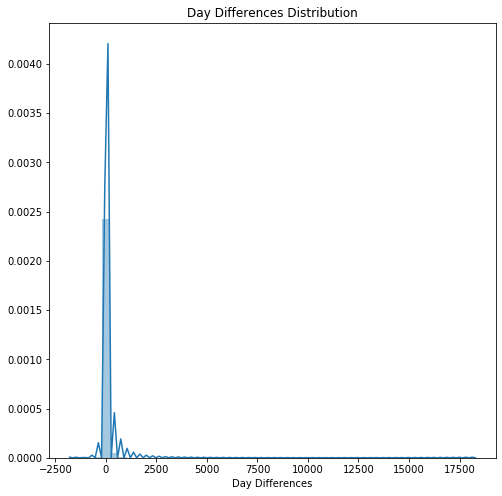

In [25]:
day_diff = tsa_new['Day Differences'].dropna()
plt.figure(figsize=(8,8))
sns.distplot(day_diff)
plt.title('Day Differences Distribution')
plt.show

If we seen it from the plot, it seems there is days that less than 0 and even over than 1000. Lets try to visualize them both

<function matplotlib.pyplot.show(*args, **kw)>

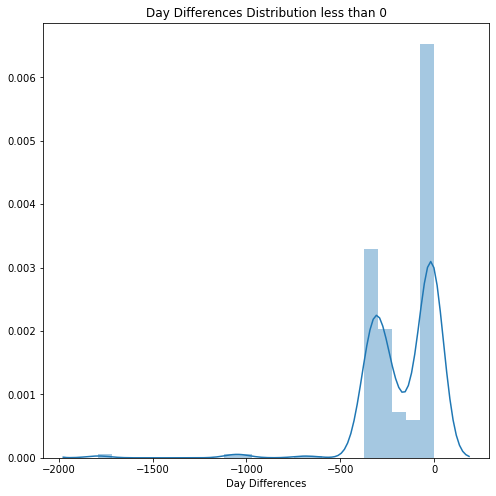

In [26]:
#day_diff1 -> with Day Differences < 0

day_diff1 = tsa_new[tsa_new['Day Differences'] < 0]['Day Differences']
plt.figure(figsize=(8,8))
sns.distplot(day_diff1)
plt.title('Day Differences Distribution less than 0')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

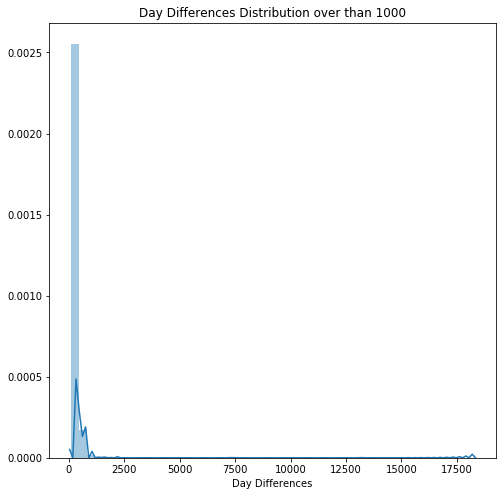

In [27]:
#day_diff2 -> with Day Differences >1000

day_diff2 = tsa_new[tsa_new['Day Differences'] > 100]['Day Differences']
plt.figure(figsize=(8,8))
sns.distplot(day_diff2)
plt.title('Day Differences Distribution over than 1000')
plt.show

## Question

Why do you think there is day that way more than thousand days differences, and why some day differences are less than 0? (claim was made before the incident is like someone predicting a future after all).

### for day differences lee than 0

In [28]:
print('Original Data')
print(tsa_new['Airline Name'].value_counts())
print('')
print('Airline Name with Day Diff Less than 0')
print(tsa_new[tsa_new['Day Differences']<0]['Airline Name'].value_counts())
print('')
print('Airline Name with Day Diff More than 1000')
print(tsa_new[tsa_new['Day Differences']>1000]['Airline Name'].value_counts())

Original Data
American Airlines          4377
Delta Air Lines            4371
UAL                        3507
Southwest Airlines         3258
Continental Airlines       2363
                           ... 
China Southern Airlines       1
Big Sky Airlines              1
SonAir                        1
LOT Polish Airlines           1
Aviaco                        1
Name: Airline Name, Length: 242, dtype: int64

Airline Name with Day Diff Less than 0
American Airlines                  42
UAL                                38
Delta Air Lines                    35
Continental Airlines               29
USAir                              25
Southwest Airlines                 24
Northwest Airlines                 21
Jet Blue                           11
AirTran Airlines                   10
Southwest Airlines                  9
Frontier Airlines                   7
Alaska Airlines                     6
Delta Air Lines                     6
UAL                                 6
USAir           

Dari cell diatas dapat dilihat secara keseluruhan, American Airline menjadi maskapai terbanyak jumlah claimnya, begitupun setelah difilter untuk jarak antara incident dengan claim yang dibawah nol hari.
Namun jika dilihat berdasarkan jarak antara incident dengan claim yang lebih dari 10 hari yaitu maskapai Delta Air Line.

In [29]:
print('Original Data')
print(tsa_new['Claim Type'].value_counts())
print('')
print('Claim Type with Day Diff Less than 0')
print(tsa_new[tsa_new['Day Differences']<0]['Claim Type'].value_counts())
print('')
print('Claim Type with Day Diff More than 1000')
print(tsa_new[tsa_new['Day Differences']>1000]['Claim Type'].value_counts())

Original Data
Passenger Property Loss    29713
Property Damage            18590
Personal Injury              394
Passenger Theft              115
Employee Loss (MPCECA)       114
Motor Vehicle                 96
Complaint                     13
Name: Claim Type, dtype: int64

Claim Type with Day Diff Less than 0
Passenger Property Loss    249
Property Damage            169
Employee Loss (MPCECA)       5
Passenger Theft              3
Complaint                    1
Personal Injury              1
Name: Claim Type, dtype: int64

Claim Type with Day Diff More than 1000
Passenger Property Loss    14
Property Damage             9
Personal Injury             3
Passenger Theft             1
Motor Vehicle               1
Name: Claim Type, dtype: int64


Dari cell diatas dapat dilihat bahwa untuk jenis claim baik untuk data original, jeda waktu antara incident dengan claim yang dibawah nol hari maupun lebih dari 1000 hari, maka jenis claim 'Passenger Property Loss' adalah yang terbanyak disusul oleh jenis claim 'Properti Damage'

In [30]:
print('Original Data')
print(tsa_new['Claim Site'].value_counts())
print('')
print('Claim Site with Day Diff Less than 0')
print(tsa_new[tsa_new['Day Differences']<0]['Claim Site'].value_counts())
print('')
print('Claim Site with Day Diff More than 1000')
print(tsa_new[tsa_new['Day Differences']>1000]['Claim Site'].value_counts())

Original Data
Checked Baggage    39937
Checkpoint         10051
Other                695
Motor Vehicle        131
Bus Station            3
Name: Claim Site, dtype: int64

Claim Site with Day Diff Less than 0
Checked Baggage    341
Checkpoint          95
Other                3
Name: Claim Site, dtype: int64

Claim Site with Day Diff More than 1000
Checked Baggage    18
Checkpoint         10
Other               1
Motor Vehicle       1
Name: Claim Site, dtype: int64


Serupa dengan Jenis Claim, untuk 'Claim Site' atau tempat kejadian tidak berbeda jumlah terbanyak claimnya baik untuk data awal, jangka waktu kurang dari nol hari dan jangka waktu lebih dari 1000 hari. Ketiga kondisi memiliki claim site terbanyak yang sama yaitu 'Checked Baggage' dan disusul oleh 'Checkpoint' sebagai jumlah Claim Site terbanyak kedua.

In [31]:
print('Original Data')
print(tsa_new['Item'].value_counts())
print('')
print('Item with Day Diff Less than 0')
print(tsa_new[tsa_new['Day Differences']<0]['Item'].value_counts())
print('')
print('Item with Day Diff More than 1000')
print(tsa_new[tsa_new['Day Differences']>1000]['Item'].value_counts())

Original Data
Other                                                                                                         9183
Luggage (all types including footlockers)                                                                     4818
Clothing - Shoes; belts; accessories; etc.                                                                    3761
Jewelry - Fine                                                                                                2488
Locks                                                                                                         2408
                                                                                                              ... 
Baggage/Cases/Purses; Clothing; Clothing; Clothing; Cosmetics & Grooming; Medical/Science; Medical/Science       1
Baggage/Cases/Purses; Jewelry & Watches; Travel Accessories                                                      1
Jewelry & Watches; Medical/Science; Personal Electronics          

Untuk jenis item yang diklaim, baik untuk data awal maupun jangka waktu yang kurang dari 10 hari dan yang lebih dari 1000 hari, jumlah item terbanyak yang diklaim adalah 'Other'. Untuk terbanyak kedua adalah kategori item 'Luggage (all types including footlockers)' untuk data keseluruhan dan yang memiliki jangka waktu claim kurang dari nol hari. Namun untuk jangka waktunya lebih dari 1000 hari, kategori item terbanyak kedua adalah Clothing - Shoes; belts; accessories; etc.

In [32]:
print('Original Data')
print(tsa_new['Claim Amount'].value_counts())
print('')
print('Claim Amount with Day Diff Less than 0')
print(tsa_new[tsa_new['Day Differences']<0]['Claim Amount'].value_counts())
print('')
print('Claim Amount with Day Diff More than 1000')
print(tsa_new[tsa_new['Day Differences']>1000]['Claim Amount'].value_counts())

Original Data
$0.00       7065
$100.00      954
$50.00       859
$200.00      804
$150.00      761
            ... 
$652.00        1
$353.21        1
$34.06         1
$308.99        1
$56.82         1
Name: Claim Amount, Length: 13247, dtype: int64

Claim Amount with Day Diff Less than 0
$0.00         17
$50.00        17
$300.00       10
$200.00       10
$80.00         8
              ..
$365.00        1
$454.05        1
$1;227.95      1
$12.00         1
$49.95         1
Name: Claim Amount, Length: 281, dtype: int64

Claim Amount with Day Diff More than 1000
$100.00           2
$3;540.00         1
$487.00           1
$13.78            1
$58.25            1
$25.00            1
$12.72            1
$18.00            1
$1;065.09         1
$32.14            1
$29.99            1
$58;750.00        1
$65.00            1
$190.00           1
$3;767.85         1
$96.58            1
$30.00            1
$1;034;650.00     1
$8.48             1
$5;015.00         1
$249.99           1
$199.99        

Untuk niai claim atau 'Claim Amount', baik untuk original data maupun jangka waktu yang kurang dari 10 hari dan yang lebih dari 1000 hari, 'Claim Amount' terbanyak adalah nol dollar. 
Untuk terbanyak kedua, kedua data memiliki perbedaan yaitu untuk 'Claim Amount' terbanyak kedua pada original data adalah 100 dollar, sedangkan untuk data yang jumlah claimnya kurang dari nol hari adalah 50 dollar.
Pada data yang meimiliki jangka waktu claim lebih dari 1000 hari, 'Claim Amount' terbanyak bernilai 100 dollar, sedangkan jenis 'Claim Amount' terbanyak kedua bernilai 199 dollar.

In [33]:
print('Original Data')
print(tsa_new['Status'].value_counts())
print('')
print('Status with Day Diff Less than 0')
print(tsa_new[tsa_new['Day Differences']<0]['Status'].value_counts())
print('')
print('Status with Day Diff More than 1000')
print(tsa_new[tsa_new['Day Differences']>1000]['Status'].value_counts())

Original Data
Denied                                                                                                                           17134
Approved                                                                                                                          8724
Deny                                                                                                                              7010
Settled                                                                                                                           6970
Approve in Full                                                                                                                   3165
Canceled                                                                                                                          1708
Settle                                                                                                                            1453
Insufficient; one of the following items 

Dari cell diatas dapat dilihat, untuk jumlah kategori status terbanyak dari ketiga data tersebut memiliki kategori status yang sama yaitu 'Denied'. Sama halnya dengan jumlah terbanyak kedua pada kategori status untuk ketiga data tersebut yaitu status 'Approved'

### Kesimpulan yang dapat diambil:
1. Faktor - faktor yang dapat menyebabkan perbedaan jumlah claim, yaitu untuk claim yang jangka waktunya dibawah nol dengan yang dari 1000 hari bisa terjadi karena disebkan perbedaan 'Airline Name', jenis 'Item', serta 'Claim Amount'
2. Untuk faktor- faktor seperti 'Claim Site', 'Claim type', 'Status' claim tidak berbeda untuk jumlh claim terbanyak baik yang pertama ataupun yang kedua

Remove the $ sign (some data need even more clean up by replacing the ; sign into . sign) from the Claim Amount columns and Close Amount columns, and change those columns datatype into float datatype

In [34]:
tsa_new['Claim Amount'].unique()

array(['$15.00 ', '$2;463.00 ', '$430.98 ', ..., '$253.25 ', '$699.25 ',
       '$4;531.16 '], dtype=object)

In [35]:
tsa_new = tsa_new.dropna(subset=['Claim Amount'])
tsa_new = tsa_new.dropna(subset=['Close Amount'])

for i in tsa_new.index:
    x = str(tsa_new['Claim Amount'][i])
    y = str(tsa_new['Close Amount'][i])
#     x = x.replace('$','')
#     y = y.replace('$','')
    if ';' in x:
        tsa_new.at[i, 'Claim Amount'] = x.replace(';', '')
    if ';' in y:
        tsa_new.at[i, 'Close Amount'] = y.replace(';', '')

In [36]:
for i in tsa_new.index:
    x = str(tsa_new['Claim Amount'][i])
    y = str(tsa_new['Close Amount'][i])
    if '$' in x:
        tsa_new.at[i, 'Claim Amount'] = x.replace('$', '')
    if '$' in y:
        tsa_new.at[i, 'Close Amount'] = y.replace('$', '')
   

In [39]:
tsa_new['Claim Amount'] = tsa_new['Claim Amount'].astype(float)
tsa_new['Close Amount'] = tsa_new['Close Amount'].astype(float)

Create a new columns called Amount Differences by substract the Claim Amount with Close Amount columns

In [42]:
tsa_new['Amount Differences'] = tsa_new['Claim Amount'] - tsa_new['Close Amount']

In [43]:
tsa_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33470 entries, 13729 to 36248
Data columns (total 15 columns):
Claim Number          33470 non-null object
Date Received         33437 non-null datetime64[ns]
Incident Date         33380 non-null datetime64[ns]
Airport Code          32548 non-null object
Airport Name          32548 non-null object
Airline Name          26397 non-null object
Claim Type            32127 non-null object
Claim Site            33396 non-null object
Item                  32659 non-null object
Claim Amount          33470 non-null float64
Status                33470 non-null object
Close Amount          33470 non-null float64
Disposition           32269 non-null object
Day Differences       33347 non-null float64
Amount Differences    33470 non-null float64
dtypes: datetime64[ns](2), float64(4), object(9)
memory usage: 5.3+ MB


In [52]:
tsa_new = tsa_new.sort_index()
tsa_new = tsa_new.reset_index(drop=True)
tsa_new.head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences,Amount Differences
0,0909816M,2002-02-07,2003-01-06,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),50.00,Approved,50.0,Approve in Full,-333.0,0.00
1,15242,2002-07-12,2002-05-31,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,NaN,Other,Luggage (all types including footlockers),200.00,Denied,0.0,Deny,42.0,200.00
2,16759,2002-08-21,2002-07-12,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Checkpoint,Other,21.44,Approved,21.0,Approve in Full,40.0,0.44
3,17846,2002-09-09,2002-08-30,BOS,Boston (Logan) International Airport,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),1832.22,Canceled,0.0,NaN,10.0,1832.22
4,18202,2002-09-16,2002-08-12,BWI,Baltimore/Washington Intl Thurgood Marshall,NaN,NaN,Checkpoint,Computer - Laptop,678.00,Approved,678.0,Approve in Full,35.0,0.00


Lets try to visualize it again similar to the Day Differences feature, but this time we would use the Amount Differences feature (still just drop the NaN first)

<function matplotlib.pyplot.show(*args, **kw)>

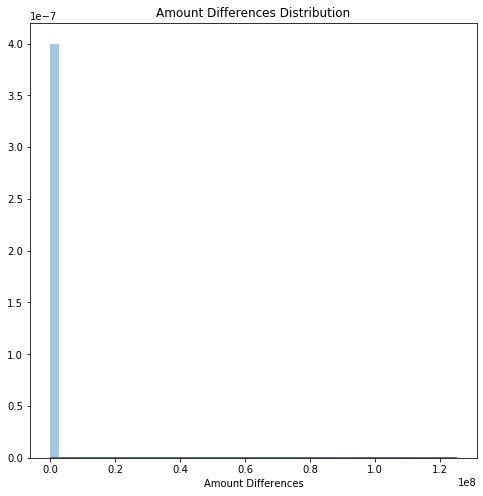

In [54]:
amount_diff = tsa_new['Amount Differences']
plt.figure(figsize=(8,8))
sns.distplot(amount_diff)
plt.title('Amount Differences Distribution')
plt.show

There is seems a differences in number that was way far. This time, lets use the Interquartile range (IQR) method to find the datapoint that seems to be an outlier based on the Amount Differences column, show the dataframe, and lets describe the Claim Amount and Close Amount column of the outlier dataframe based on the Amount Differences column

In [55]:
amountdiff_desc = tsa_new.describe()['Amount Differences']
amountdiff_desc

count    3.347000e+04
mean     5.217843e+03
std      6.843299e+05
min     -4.311000e+02
25%      0.000000e+00
50%      9.629000e+01
75%      3.400000e+02
max      1.250000e+08
Name: Amount Differences, dtype: float64

In [66]:
# IQR = (Inter Quartile Range)
Q1 = amountdiff_desc['25%']
Q3 = amountdiff_desc['75%']
IQR = Q3-Q1
batas_bawah = Q1-(1.5*IQR)
batas_atas = Q3 + (1.5*IQR)
# print(IQR)
# print(batas_atas)
# print(batas_bawah)

In [67]:
tsa_new_out = tsa_new[(tsa_new['Amount Differences'] < batas_bawah) | (tsa_new['Amount Differences'] > batas_atas)]
tsa_new_out

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences,Amount Differences
3,17846,2002-09-09,2002-08-30 00:00:00,BOS,Boston (Logan) International Airport,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),1832.22,Canceled,0.00,NaN,10.0,1832.22
9,19133,2002-10-02,2002-08-22 00:00:00,CLE,Cleveland Hopkins International,Northwest Airlines,NaN,Other,Computer - Laptop,2000.00,Denied,0.00,Deny,41.0,2000.00
14,18614,2002-10-17,2002-09-14 00:00:00,MCO,Orlando International Airport,American Airlines,Property Damage,Checkpoint,Computer - Laptop,2000.00,Settled,600.00,Settle,33.0,1400.00
15,18356,2002-10-23,2002-09-18 00:00:00,LGA,LaGuardia,NaN,NaN,Checkpoint,Computer - Laptop,1801.99,Settled,291.67,Settle,35.0,1510.32
19,21817,2002-10-29,2002-10-05 00:00:00,MCO,Orlando International Airport,Delta Air Lines,NaN,Other,Other,7500.00,Denied,0.00,Deny,24.0,7500.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33435,2009123167012,2009-12-29,2009-12-18 00:00:00,MIA,Miami International Airport,American Airlines,Property Damage,Checked Baggage,NaN,2200.00,Denied,0.00,Deny,11.0,2200.00
33437,2009123167017,2009-12-29,2009-12-02 15:30:00,JFK,John F. Kennedy International,KLM Royal Dutch Airlines,Passenger Property Loss,Checked Baggage,Clothing - Shoes; belts; accessories; etc.; Co...,900.00,Denied,0.00,Deny,26.0,900.00
33440,2010010867323,2009-12-29,2009-12-21 15:15:00,CVG,Cincinnati/Northern Kentucky International,Delta Air Lines,Property Damage,Checkpoint,Computer - Laptop,1240.00,Denied,0.00,Deny,7.0,1240.00
33448,2009123066912,2009-12-30,2009-12-15 00:00:00,GSO,Piedmont Triad International Airport,Delta Air Lines,Property Damage,Checked Baggage,NaN,2300.00,Denied,0.00,Deny,15.0,2300.00


In [68]:
claim_out_desc = tsa_new_out.describe()['Claim Amount']
claim_out_desc

count    4.103000e+03
mean     4.164579e+04
std      1.954354e+06
min      8.510100e+02
25%      1.214375e+03
50%      1.821750e+03
75%      3.000000e+03
max      1.250000e+08
Name: Claim Amount, dtype: float64

In [69]:
close_out_desc = tsa_new_out.describe()['Close Amount']
close_out_desc

count     4103.000000
mean       114.613646
std        686.521806
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      20000.000000
Name: Close Amount, dtype: float64

It seems that Claim Amount feature really affecting lot of the differences that happen as 75% outlier data that in the Close Amount feature is still 0.

## Question

I assume that many of this big differences happen because these people tend to request for bigger money than what it should be. Do you agree or disagree with my assumption (With an assumption that not outlier is have normal amount differences and outlier have a really big amount differences)? why? Try to explain it with the data 

In [71]:
tsa_new_noout = tsa_new[(tsa_new['Amount Differences'] > batas_bawah) & (tsa_new['Amount Differences'] < batas_atas)]
tsa_new_noout

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences,Amount Differences
0,0909816M,2002-02-07,2003-01-06 00:00:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),50.00,Approved,50.00,Approve in Full,-333.0,0.00
1,15242,2002-07-12,2002-05-31 00:00:00,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,NaN,Other,Luggage (all types including footlockers),200.00,Denied,0.00,Deny,42.0,200.00
2,16759,2002-08-21,2002-07-12 00:00:00,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Checkpoint,Other,21.44,Approved,21.00,Approve in Full,40.0,0.44
4,18202,2002-09-16,2002-08-12 00:00:00,BWI,Baltimore/Washington Intl Thurgood Marshall,NaN,NaN,Checkpoint,Computer - Laptop,678.00,Approved,678.00,Approve in Full,35.0,0.00
5,16961,2002-09-18,2002-08-05 00:00:00,NaN,NaN,Delta Air Lines,NaN,Checked Baggage,Other,175.00,Settled,171.99,Settle,44.0,3.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33465,2010010667221,2009-12-30,2009-12-01 16:40:00,AUS,Austin-Bergstrom International Airport,Alaska Airlines,Property Damage,Checked Baggage,Medical Equipment & Insturments,80.00,Settled,72.00,Settle,28.0,8.00
33466,2010010867347,2009-12-30,2009-11-02 00:00:00,ORD,Chicago O'Hare International Airport,UAL,Passenger Property Loss,Checked Baggage,DVD/CD Players; Handbags & Purses (leather or ...,546.95,Settled,514.73,Settle,58.0,32.22
33467,2010010867360,2009-12-30,2009-12-14 08:30:00,SJU,Luis Munoz Marin International,American Airlines,Property Damage,Checked Baggage,Alcoholic beverages; Cosmetics - Perfume; toil...,185.00,Settled,179.23,Settle,15.0,5.77
33468,2010010667197,2009-12-31,2009-12-10 12:40:00,DEN,Denver International Airport,UAL,Passenger Property Loss,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,70.00,Approved,70.00,Approve in Full,20.0,0.00


In [72]:
claim_noout_desc = tsa_new_noout.describe()['Claim Amount']
claim_noout_desc

count     29340.000000
mean        244.320358
std        1563.219050
min           0.000000
25%          52.977500
50%         139.925000
75%         300.000000
max      250000.000000
Name: Claim Amount, dtype: float64

In [73]:
close_noout_desc = tsa_new_noout.describe()['Close Amount']
close_noout_desc

count     29340.000000
mean        100.630925
std        1554.838788
min           0.000000
25%           0.000000
50%          10.000000
75%          80.000000
max      250000.000000
Name: Close Amount, dtype: float64

Berdasarkan data yang diantara batas atas dan batas bawah 'Amount Differences' atau yang no outlier, 'Claim Amount' and 'Close Amount' sama - sama memiliki 75% outlier data yang besar.

In [76]:
import statsmodels.api as sm
import pylab

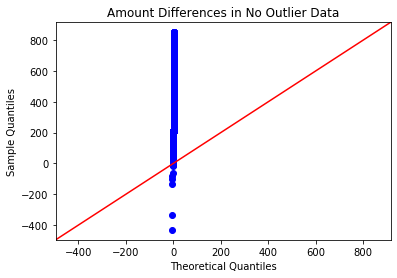

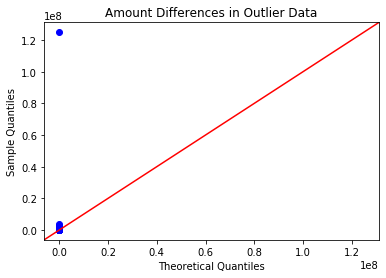

In [90]:
sm.qqplot(tsa_new_noout['Amount Differences'], line='45')
plt.title('Amount Differences in No Outlier Data')

sm.qqplot(tsa_new_out['Amount Differences'], line='45')
plt.title('Amount Differences in Outlier Data')
pylab.show()

In [91]:
from scipy.stats import shapiro, normaltest, anderson

In [92]:
def try_normal(data):
    result = {'Anderson': {i:j for i,j in zip(anderson(data)[2], anderson(data)[1])},
             'Shapiro': shapiro(data)[1],
             'K^2': normaltest(data)[1]}
    result['Anderson']['stat'] = anderson(data)[0]
    return result

In [93]:
try_normal(tsa_new_out['Amount Differences'])

{'Anderson': {15.0: 0.575,
  10.0: 0.655,
  5.0: 0.786,
  2.5: 0.917,
  1.0: 1.091,
  'stat': 1559.9949476747934},
 'Shapiro': 0.0,
 'K^2': 0.0}

In [94]:
try_normal(tsa_new_noout['Amount Differences'])

{'Anderson': {15.0: 0.576,
  10.0: 0.656,
  5.0: 0.787,
  2.5: 0.918,
  1.0: 1.092,
  'stat': 2309.5630893590715},
 'Shapiro': 0.0,
 'K^2': 0.0}

Berdasarkan dari qqplot, uji normalitas dengan Anderson dan Shapiro dengan alpha = 5%, maka data 'Amount Diffferences' pada no outlier dan outlier tidak berdistribusi normal

In [95]:
pd.concat([tsa_new_noout['Amount Differences'].reset_index(drop=True), 
           tsa_new_out['Amount Differences'].reset_index(drop=True)], axis = 1).corr()

,Amount Differences,Amount Differences
Amount Differences,1.000000,-0.010038
Amount Differences,-0.010038,1.000000


In [96]:
pd.concat([tsa_new_noout['Amount Differences'].reset_index(drop=True), 
           tsa_new_out['Amount Differences'].reset_index(drop=True)], axis = 1).corr('spearman')

,Amount Differences,Amount Differences
Amount Differences,1.000000,-0.003419
Amount Differences,-0.003419,1.000000


Hasil Uji korelasi keduanya baik menggunakan metode Pearson maupun Spearman hampir mendekati nol dan dapat disimpulkan bahwa keduanya independent atau tidak saling berkorelasi

Karena hasil normality test menunjukkan kedua data tidak berdistribusi normal dan hasil uji korelasi menunjukkan keduanya tidak saling berkorelasi, maka untuk melihat kesamaan dari dua variabel tersebut menggunakan uji mannwhitneyu

In [97]:
from scipy.stats import mannwhitneyu

In [98]:
#H0 : Tidak ada perbedaan Amount Difference pada no utlier dan outlier
#H1 : Terdapat perbedaan antara keduanya

result = list(mannwhitneyu(tsa_new_noout['Amount Differences'],
                          tsa_new_out['Amount Differences']))
print('U-Statistik: ', result[0])
print('P-Value: ', result[1])

U-Statistik:  0.0
P-Value:  0.0


Karena nilai P-Val dari hasil uji mannwhitneyu diatas kurang dari alpha=5% jika mengambil confidence level 95%, maka H0 ditolak dan H1 diterima.
Kesimpulannya terdapat perbedaan 'Amount Differences' yang no outlier dan no outier

Untuk menjawab pertanyaan diatas, karena hasil uji menunjukkan kalau kedua Amount Difference terdapat perbedaan, maka saya setuju jika orang akan cenderung me-request uang dalam jumlah yang lebih banyak.

## Analysis
We have try to cleaning some of the data that we have, and now we could try to done few analysis from the data we had. Try to answer this following question.

## Question
Is there Any relationship between the Airport and/or the Airline with the number of the claim that happen and the Claim Type? Also why is there a NaN in the Claim Type column?

If you realize, there is many different classes in the Status and Disposition column. What pattern you could find in these 2 columns because of this classes variation? is there any relation with the other columns?

In [105]:
tsa_new.groupby('Airline Name').mean()['Claim Amount']

Airline Name
ATA Aerocondor                             504.968269
Aer Lingus                                 818.649375
Aero California                            250.000000
Aero Flot                                 1050.395000
Aero Mexico                                677.799048
                                            ...      
Virgin Atlantic                            674.927522
Virgin Express                             959.535000
Vision Airlines                            105.000000
Western Pacific Airlines Inc Westpac        57.555000
Westjet Airlines Ltd                    105400.823684
Name: Claim Amount, Length: 144, dtype: float64

In [106]:
tsa_new.groupby('Claim Type').mean()['Claim Amount']

Claim Type
Employee Loss (MPCECA)        533.434950
Motor Vehicle                1943.967632
Passenger Property Loss       866.973121
Passenger Theft               626.305556
Personal Injury            863374.515169
Property Damage               499.722924
Name: Claim Amount, dtype: float64

In [107]:
tsa_new.groupby('Airline Name').mean()['Close Amount']

Airline Name
ATA Aerocondor                           70.860577
Aer Lingus                              374.284375
Aero California                         215.000000
Aero Flot                                50.395000
Aero Mexico                              27.382857
                                           ...    
Virgin Atlantic                         122.201504
Virgin Express                          333.645000
Vision Airlines                          55.000000
Western Pacific Airlines Inc Westpac     10.000000
Westjet Airlines Ltd                     44.453158
Name: Close Amount, Length: 144, dtype: float64

In [108]:
tsa_new.groupby('Claim Type').mean()['Close Amount']

Claim Type
Employee Loss (MPCECA)      96.541881
Motor Vehicle              938.152632
Passenger Property Loss     95.103669
Passenger Theft            115.622500
Personal Injury            807.253764
Property Damage             96.278957
Name: Close Amount, dtype: float64

Dari keempat cell diatas terlihat jika Airline Name dan Claim Type tidak mempengaruhi baik Claim Amount maupun  Close Amount

In [114]:
tsa_new['Claim Type'].isna().sum()

1343

In [116]:
tsa_new_typena = tsa_new[tsa_new['Claim Type'].isna()]
tsa_new_typena

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences,Amount Differences
1,15242,2002-07-12,2002-05-31,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,NaN,Other,Luggage (all types including footlockers),200.00,Denied,0.00,Deny,42.0,200.00
4,18202,2002-09-16,2002-08-12,BWI,Baltimore/Washington Intl Thurgood Marshall,NaN,NaN,Checkpoint,Computer - Laptop,678.00,Approved,678.00,Approve in Full,35.0,0.00
5,16961,2002-09-18,2002-08-05,NaN,NaN,Delta Air Lines,NaN,Checked Baggage,Other,175.00,Settled,171.99,Settle,44.0,3.01
6,18394,2002-09-20,2002-08-12,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,NaN,Checkpoint,Other,150.00,Denied,0.00,Deny,39.0,150.00
9,19133,2002-10-02,2002-08-22,CLE,Cleveland Hopkins International,Northwest Airlines,NaN,Other,Computer - Laptop,2000.00,Denied,0.00,Deny,41.0,2000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31623,2009051858750,2009-05-18,2009-05-09,NaN,NaN,Southeast Airlines,NaN,NaN,NaN,0.00,Canceled,0.00,NaN,9.0,0.00
31640,2009052159348,2009-05-19,2009-05-17,LAS,McCarran International,Jet Blue,NaN,NaN,Other,339.95,Denied,0.00,Deny,2.0,339.95
32137,2009071761397,2009-07-14,2009-06-12,LGA,LaGuardia,Northwest Airlines,NaN,Checkpoint,Jewelry - Fine,439.00,Denied,0.00,Deny,32.0,439.00
32595,2009090363322,2009-09-01,2009-07-17,F,Foreign airport,Northwest Airlines,NaN,Checked Baggage,Locks; Luggage (all types including footlockers),400.00,Denied,0.00,Deny,46.0,400.00


In [118]:
tsa_new_typena['Airline Name'].value_counts()

American Airlines                      145
Delta Air Lines                        137
UAL                                    102
Northwest Airlines                      79
USAir                                   78
Continental Airlines                    70
Southwest Airlines                      68
Alaska Airlines                         34
Jet Blue                                22
America West                            21
AirTran Airlines                        14
Spirit Airlines                         13
Frontier Airlines                        9
British Airways                          7
America Trans Air                        5
Air Canada                               5
Aloha Airlines                           4
Delta (Song)                             3
Air France                               3
Lufthansa                                3
Qantus Airways                           2
American Eagle                           2
Malaysian Airline System                 1
Air Belgium

In [119]:
tsa_new_typena['Claim Site'].value_counts()

Checked Baggage    1025
Checkpoint          194
Other                92
Motor Vehicle         3
Name: Claim Site, dtype: int64

In [120]:
tsa_new_typena['Item'].value_counts()

Other                                                                                                                       397
Clothing - Shoes; belts; accessories; etc.                                                                                  197
Luggage (all types including footlockers)                                                                                   156
Jewelry - Fine                                                                                                              142
Cameras - Digital                                                                                                           121
Locks                                                                                                                        53
Computer - Laptop                                                                                                            42
Eyeglasses - (including contact lenses)                                                                 

In [121]:
tsa_new_typena['Status'].value_counts()

Settled                         473
Denied                          440
Approved                        379
Canceled                         48
Closed as a contractor claim      3
Name: Status, dtype: int64

In [122]:
tsa_new_typena['Claim Amount'].value_counts()

200.00     35
100.00     34
300.00     27
50.00      25
150.00     23
           ..
278.98      1
152.40      1
2550.00     1
64.95       1
1299.99     1
Name: Claim Amount, Length: 780, dtype: int64

In [123]:
tsa_new_typena['Close Amount'].value_counts()

0.00       473
50.00       37
150.00      19
100.00      17
200.00      17
          ... 
299.95       1
566.10       1
309.20       1
4086.00      1
718.99       1
Name: Close Amount, Length: 535, dtype: int64

In [124]:
tsa_new_typena['Disposition'].value_counts()

Settle             473
Deny               440
Approve in Full    379
Name: Disposition, dtype: int64

In [125]:
tsa_new_typena['Day Differences'].value_counts()

 12.0      36
 11.0      33
 23.0      32
 18.0      32
 16.0      30
           ..
 203.0      1
 277.0      1
 258.0      1
 1525.0     1
-288.0      1
Name: Day Differences, Length: 191, dtype: int64

In [132]:
tsa_new_typena['Day Differences'].describe()

count    1306.000000
mean       43.483155
std        82.197035
min     -1072.000000
25%        18.000000
50%        31.000000
75%        52.000000
max      1525.000000
Name: Day Differences, dtype: float64

In [127]:
tsa_new_typena['Amount Differences'].value_counts()

0.00       385
100.00      27
200.00      23
150.00      23
50.00       18
          ... 
302.27       1
7.69         1
32.48        1
10.37        1
1950.00      1
Name: Amount Differences, Length: 637, dtype: int64

In [128]:
tsa_new_typena['Amount Differences'].value_counts().describe()

count    637.000000
mean       2.108320
std       15.349775
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max      385.000000
Name: Amount Differences, dtype: float64

Beberapa faktor yang dapat menyebabkan Claim Type bernilai nan, yaitu: 
1. Dispostion banyak yang Settle dan Deny
2. Status juga banyak yang Settled dan Denied
3. Claim Site terjadi pada saat Checked Baggage
4. Amount Differences banyak yang bernilai nol dollar.

In [137]:
tsa_new.groupby('Status').mean()['Amount Differences']

Status
Approved                            0.823646
Canceled                         3580.431637
Closed as a contractor claim     1486.613639
Denied                          10085.782568
Settled                           338.577372
Name: Amount Differences, dtype: float64

In [139]:
tsa_new.groupby('Disposition').mean()['Amount Differences']

Disposition
Approve in Full        0.823551
Deny               10086.344517
Settle               338.553175
Name: Amount Differences, dtype: float64

Dari kedua cell diatas, Status dan Disposition seperti terlihat memiliki kesamaan dari mean Amount Differences

In [140]:
tsa_new.groupby('Status').mean()['Day Differences']

Status
Approved                        43.286761
Canceled                        49.750281
Closed as a contractor claim    61.478548
Denied                          43.221483
Settled                         41.549884
Name: Day Differences, dtype: float64

In [141]:
tsa_new.groupby('Disposition').mean()['Day Differences']

Disposition
Approve in Full    43.284750
Deny               43.220837
Settle             41.540419
Name: Day Differences, dtype: float64

Dari kedua cell diatas, Status dan Disposition seperti terlihat memiliki kesamaan dari mean Day Differences